In [2]:
## Creating Fundamental curve and maxwell mode elements from G' and G'' frequency sweeps.
# we first need to import required libraries
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.labelsize': 22})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 10})
mpl.rcParams.update({'ytick.labelsize': 10})

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np #Needed for a bunch of mathematical operations.

## Importing omega, G' and G'' data

In [10]:
import xlrd #Documentation on how to use xlrd @ https://openpyxl.readthedocs.io/en/stable/

## This part will require the user to diligently take data from 
#their experiment and set up the omega G' and G'' arrays properly

#Extracting Data Experimental Data Excel File
workbook = xlrd.open_workbook('Practice_Data.xlsx')
#Setting up Model Parameters sheet
sheet_MP = workbook.sheet_by_name('LVE')

## Creating cell value range of the Maxwell Model Mode results
cell_range = sheet_MP.cell_value(2,3)
omega = np.zeros(21)
T160 = np.zeros((21,2))
T180 = np.zeros((21,2))
T200 = np.zeros((21,2))
T220 = np.zeros((21,2))
T240 = np.zeros((21,2))
T260 = np.zeros((21,2))
for i in range(0,2):
    for j in range(0,21):
        G160 = float(sheet_MP.cell_value(3+j,i+1))
        G180 = float(sheet_MP.cell_value(3+j,i+3))
        G200 = float(sheet_MP.cell_value(3+j,i+5))
        G220 = float(sheet_MP.cell_value(3+j,i+7))
        G240 = float(sheet_MP.cell_value(3+j,i+9))
        G260 = float(sheet_MP.cell_value(3+j,i+11))
        omega[j] = float(sheet_MP.cell_value(3+j,0))
        # Put the values in the matrices
        T160[j,i] = G160
        T180[j,i] = G180
        T200[j,i] = G200
        T220[j,i] = G220
        T240[j,i] = G240
        T260[j,i] = G260



## Creating the fundamental curve
First we need to make a fundamental curve by horizontally shifting the G' and G'' curves to a reference temperature.

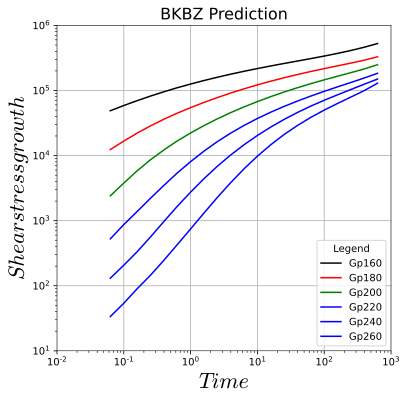

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot( omega, T160[:,0],  color='black', label='Gp160' )
ax.plot( omega, T180[:,0],  color='red', label='Gp180' )
ax.plot( omega, T200[:,0],  color='green', label='Gp200' )
ax.plot( omega, T220[:,0],  color='blue', label='Gp220' )
ax.plot( omega, T240[:,0],  color='blue', label='Gp240' )
ax.plot( omega, T260[:,0],  color='blue', label='Gp260' )
ax.set_xlabel('$Time$')
ax.set_ylabel('$Shear stress growth$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([0.01, 1000, 10, 1e6])
ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid()  

## Horizontal Shift of G' and G'' curves using the Arrhenius Equation


1031.4898690262964
81.9051273743571
10.79413855993892
2.0563037583153783
0.516420336686462
0.16041316540050754


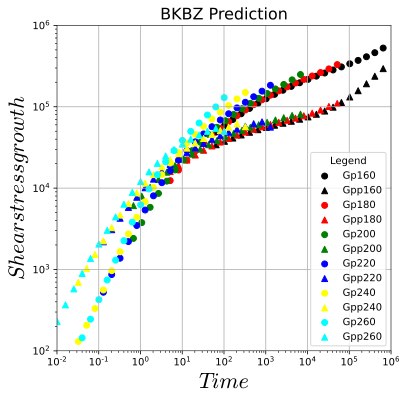

In [58]:
def HShift(T,Tref,dH,omega):
    aT = np.exp(dH*((1/T)-(1/Tref)))
    print(aT)
    return (omega*aT)
 
Tref=230
dH = 3647.805 #Fitted manually to give a Arrhenius constant.

T = 160
aT160 = HShift(T,Tref,dH,omega)
T =180
aT180 = HShift(T,Tref,dH,omega)
T=200
aT200 = HShift(T,Tref,dH,omega)
T=220
aT220 = HShift(T,Tref,dH,omega)
T=240
aT240 = HShift(T,Tref,dH,omega)
T=260
aT260 = HShift(T,Tref,dH,omega)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter( aT160, T160[:,0] , color='black', label='Gp160' )
ax.scatter( aT160, T160[:,1],marker = '^',  color='black', label='Gpp160' )
ax.scatter( aT180, T180[:,0],  color='red', label='Gp180' )
ax.scatter( aT180, T180[:,1],marker = '^',  color='red', label='Gpp180' )
ax.scatter( aT200, T200[:,0],  color='green', label='Gp200' )
ax.scatter( aT200, T200[:,1],marker = '^',  color='green', label='Gpp200' )
ax.scatter( aT220, T220[:,0],  color='blue', label='Gp220' )
ax.scatter( aT220, T220[:,1],marker = '^',  color='blue', label='Gpp220' )
ax.scatter( aT240, T240[:,0],  color='yellow', label='Gp240' )
ax.scatter( aT240, T240[:,1],marker = '^',  color='yellow', label='Gpp240' )
ax.scatter( aT260, T260[:,0],  color='cyan', label='Gp260' )
ax.scatter( aT260, T260[:,1],marker = '^',  color='cyan', label='Gpp260' )
ax.set_xlabel('$Time$')
ax.set_ylabel('$Shear stress growth$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([0.01, 1000000, 100, 1e6])
ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid()  

## Fundamental Curve Regression
We use a simple scipy spline to make the fundamental curve using appended G' and G'' data at the reference temperature.

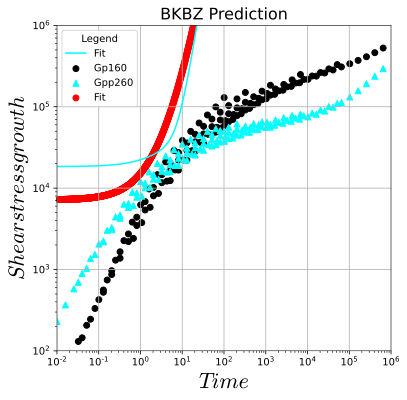

In [99]:
import scipy as sp
from scipy.optimize import curve_fit
## Appending the curves together

Gp = np.append(np.append(np.append(np.append(np.append(T160[:,0],T180[:,0]),T200[:,0]),T220[:,0]),T240[:,0]),T260[:,0])
Gpp = np.append(np.append(np.append(np.append(np.append(T160[:,1],T180[:,1]),T200[:,1]),T220[:,1]),T240[:,1]),T260[:,1])
OmegaA = np.append(np.append(np.append(np.append(np.append(aT160,aT180),aT200),aT220),aT240),aT260)

#Interpolating
GpFit = np.polyfit(np.log(OmegaA),(Gp),deg = 3)
GppFit = np.polyfit(np.log(OmegaA),(Gpp),deg = 3)
OmegaFund = np.logspace(-2,3,1000)
GpFund = np.polyval(GpFit,OmegaFund)
GppFund = np.polyval(GppFit,OmegaFund)


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter( OmegaA, Gp , color='black', label='Gp160' )
ax.scatter( OmegaA, Gpp,marker = '^',  color='cyan', label='Gpp260' )
ax.scatter( OmegaFund, GpFund,  color='red', label='Fit' )
ax.plot( OmegaFund, GppFund,  color='cyan', label='Fit' )

ax.set_xlabel('$Time$')
ax.set_ylabel('$Shear stress growth$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([0.01, 1000000, 100, 1e6])
ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid()  